# Marriage Pact 

# Step 1: Create a dataframe/excell spreadsheet with fake data

Later 
* randomize the creation of answers
* add more possible answers
* add a check to see if there are two of the same phone numbers – if so remove the first response



In [34]:
import pandas as pd
filepath = '/Users/maycaj/Documents/MarriagePact/FakeData2.xlsx'
df = pd.read_excel(filepath)
df

,Phone Number,Male,Trans,Nonbinary,Likes Men,Likes Women,Likes Trans,Likes Non-BI,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,832-239-3232,True,True,True,False,True,True,True,1,2,4,5,6,6,6,3,3
1,970-298-3892,True,False,False,True,False,False,False,6,5,4,2,4,1,3,1,2
2,281-209-2091,False,False,False,False,True,False,False,7,6,2,2,5,6,2,3,6
3,336-187-3981,False,True,False,True,False,True,False,4,3,6,2,1,2,3,4,2
4,713-298-2740,True,False,False,True,True,False,False,2,1,2,3,5,6,6,2,3
5,212-298-1292,False,False,False,True,True,False,False,5,3,6,3,2,5,3,1,5
6,111-111-1111,True,False,False,True,True,False,False,6,3,2,5,7,3,4,6,5
7,222-222-2222,False,True,True,True,False,False,True,3,1,3,7,6,4,5,6,3
8,333-333-3333,False,False,False,True,True,False,False,2,5,3,1,4,4,3,1,2
9,444-444-4444,True,True,False,False,True,True,False,7,6,5,1,3,5,4,5,6


# Step 2: Define a function which takes an phone number and appends each of their answers to a list

In [35]:
# update num_questions, question start if you add more
num_questions = 9
start_questions = 7 #where preference questions start

def RowItems(phone_number):
    row_index = df.index[df['Phone Number'] == phone_number].tolist() #finds index of given phone number
    row_index = row_index[0] #list --> int
    row = []
    for item in df:
        RowElement = df[item][row_index] 
        row.append(RowElement) #adds each element in row to list
    row = row[start_questions+1:start_questions+num_questions+1] # removes first element (phone number)
    # row = [item for item in row if item is not None] # removes type none items
    return row
Answers1 = RowItems('832-239-3232')
Answers2 = RowItems('970-298-3892')
print(Answers1,Answers2)

[1, 2, 4, 5, 6, 6, 6, 3, 3] [6, 5, 4, 2, 4, 1, 3, 1, 2]


# Step 3: Define a funciton that calculates the Squared error

J(θ)= ​∑​(​(x(i))−y(i))2

 

In [36]:
def error(input1, input2):
    total = 0
    for i in range(len(input1)):
        PairError = (input1[i] - input2[i])**2 
        total += PairError
        # print(i, input1[i], input2[i], PairError, total)
    return total

error(Answers1, Answers2)


86

# Step 4: Calculate the Squared error for each pair of People & Add to DataFrame

In [37]:
# add a blank column for each phone number
for num in df['Phone Number']:
    df[num] = None
df

,Phone Number,Male,Trans,Nonbinary,Likes Men,Likes Women,Likes Trans,Likes Non-BI,Q1,Q2,...,832-239-3232,970-298-3892,281-209-2091,336-187-3981,713-298-2740,212-298-1292,111-111-1111,222-222-2222,333-333-3333,444-444-4444
0,832-239-3232,True,True,True,False,True,True,True,1,2,...,None,None,None,None,None,None,None,None,None,None
1,970-298-3892,True,False,False,True,False,False,False,6,5,...,None,None,None,None,None,None,None,None,None,None
2,281-209-2091,False,False,False,False,True,False,False,7,6,...,None,None,None,None,None,None,None,None,None,None
3,336-187-3981,False,True,False,True,False,True,False,4,3,...,None,None,None,None,None,None,None,None,None,None
4,713-298-2740,True,False,False,True,True,False,False,2,1,...,None,None,None,None,None,None,None,None,None,None
5,212-298-1292,False,False,False,True,True,False,False,5,3,...,None,None,None,None,None,None,None,None,None,None
6,111-111-1111,True,False,False,True,True,False,False,6,3,...,None,None,None,None,None,None,None,None,None,None
7,222-222-2222,False,True,True,True,False,False,True,3,1,...,None,None,None,None,None,None,None,None,None,None
8,333-333-3333,False,False,False,True,True,False,False,2,5,...,None,None,None,None,None,None,None,None,None,None
9,444-444-4444,True,True,False,False,True,True,False,7,6,...,None,None,None,None,None,None,None,None,None,None


In [38]:
for phone1 in df['Phone Number']:
    errors = []
    for phone2 in df['Phone Number']:
        Answers1 = RowItems(phone1) #___ thinks answers and errors are the same thing
        Answers2 = RowItems(phone2)
        pair_error = error(Answers1,Answers2)
        print(phone1, phone2, 'error:',pair_error)
        errors.append(pair_error)
    df[phone1] = errors

832-239-3232 832-239-3232 error: 0
832-239-3232 970-298-3892 error: 86
832-239-3232 281-209-2091 error: 91
832-239-3232 336-187-3981 error: 75
832-239-3232 713-298-2740 error: 12
832-239-3232 212-298-1292 error: 59
832-239-3232 111-111-1111 error: 57
832-239-3232 222-222-2222 error: 24
832-239-3232 333-333-3333 error: 49
832-239-3232 444-444-4444 error: 96
970-298-3892 832-239-3232 error: 86
970-298-3892 970-298-3892 error: 0
970-298-3892 281-209-2091 error: 53
970-298-3892 336-187-3981 error: 31
970-298-3892 713-298-2740 error: 74
970-298-3892 212-298-1292 error: 39
970-298-3892 111-111-1111 error: 65
970-298-3892 222-222-2222 error: 94
970-298-3892 333-333-3333 error: 27
970-298-3892 444-444-4444 error: 54
281-209-2091 832-239-3232 error: 91
281-209-2091 970-298-3892 error: 53
281-209-2091 281-209-2091 error: 0
281-209-2091 336-187-3981 error: 84
281-209-2091 713-298-2740 error: 77
281-209-2091 212-298-1292 error: 46
281-209-2091 111-111-1111 error: 46
281-209-2091 222-222-2222 error

In [39]:
df

,Phone Number,Male,Trans,Nonbinary,Likes Men,Likes Women,Likes Trans,Likes Non-BI,Q1,Q2,...,832-239-3232,970-298-3892,281-209-2091,336-187-3981,713-298-2740,212-298-1292,111-111-1111,222-222-2222,333-333-3333,444-444-4444
0,832-239-3232,True,True,True,False,True,True,True,1,2,...,0,86,91,75,12,59,57,24,49,96
1,970-298-3892,True,False,False,True,False,False,False,6,5,...,86,0,53,31,74,39,65,94,27,54
2,281-209-2091,False,False,False,False,True,False,False,7,6,...,91,53,0,84,77,46,46,99,54,23
3,336-187-3981,False,True,False,True,False,True,False,4,3,...,75,31,84,0,71,30,80,77,40,51
4,713-298-2740,True,False,False,True,True,False,False,2,1,...,12,74,77,71,0,53,61,40,37,90
5,212-298-1292,False,False,False,True,True,False,False,5,3,...,59,39,46,30,53,0,76,83,40,37
6,111-111-1111,True,False,False,True,True,False,False,6,3,...,57,65,46,80,61,76,0,25,82,57
7,222-222-2222,False,True,True,True,False,False,True,3,1,...,24,94,99,77,40,83,25,0,87,102
8,333-333-3333,False,False,False,True,True,False,False,2,5,...,49,27,54,40,37,40,82,87,0,65
9,444-444-4444,True,True,False,False,True,True,False,7,6,...,96,54,23,51,90,37,57,102,65,0


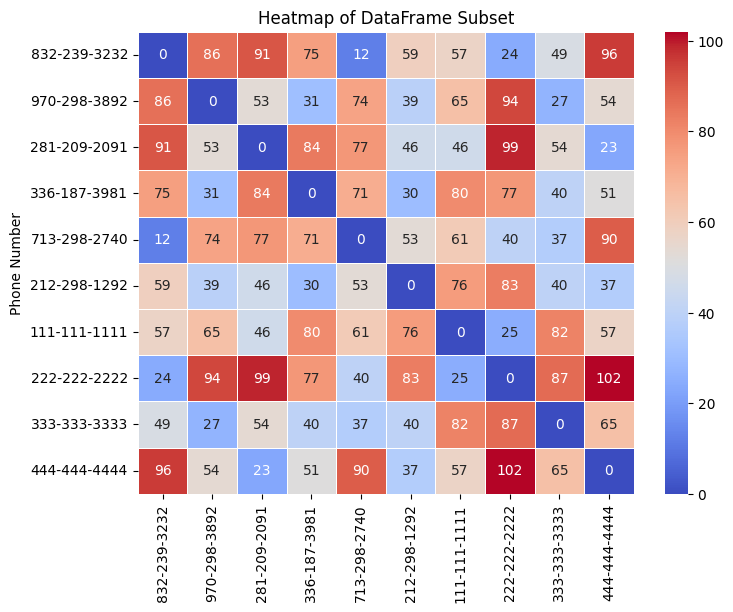

,832-239-3232,970-298-3892,281-209-2091,336-187-3981,713-298-2740,212-298-1292,111-111-1111,222-222-2222,333-333-3333,444-444-4444
Phone Number,,,,,,,,,,
832-239-3232,0,86,91,75,12,59,57,24,49,96
970-298-3892,86,0,53,31,74,39,65,94,27,54
281-209-2091,91,53,0,84,77,46,46,99,54,23
336-187-3981,75,31,84,0,71,30,80,77,40,51
713-298-2740,12,74,77,71,0,53,61,40,37,90
212-298-1292,59,39,46,30,53,0,76,83,40,37
111-111-1111,57,65,46,80,61,76,0,25,82,57
222-222-2222,24,94,99,77,40,83,25,0,87,102
333-333-3333,49,27,54,40,37,40,82,87,0,65


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Find the subset of df that has the erros
subset = df.iloc[:, start_questions+num_questions+1:]
subset.index = df['Phone Number']



# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(subset, annot=True, cmap='coolwarm', fmt="d", linewidths=.5)
plt.title('Heatmap of DataFrame Subset')
plt.show()

subset

# Step 5: add error for uncompatible matches:


I. person1 doesn't like men with a male person2 --> + 1000

II. person1 doesn't like women with a woman person2 --> +1000
* check to see if it updates both the (person1, person2) cell and the (person2, person1) cell

III. someone is matched with themselves --> + 3000

IV. person1 doesn't like trans with a trans person2 --> +1000

V. person1 doesn't like bi with a bi person2 --> +1000

In [52]:
def demographics(num):
    row_from_num = df[df['Phone Number'] == str(num)]
    male = row_from_num['Male'].values[0]
    likes_men = row_from_num['Likes Men'].values[0]
    likes_women = row_from_num['Likes Women'].values[0]

    trans = row_from_num['Trans'].values[0]
    nb = row_from_num['Nonbinary'].values[0]
    likes_trans = row_from_num['Likes Trans'].values[0]
    likes_nb = row_from_num['Likes Non-BI'].values[0]
    

    # print(num, male, likes_men, likes_women)
    statement = str(num) + ' is a '
    if trans:
        statement = statement + 'Trans '
    if nb:
        statement = statement + 'Non-Binary '
    if male:
        statement = statement + 'Male who likes: '
    else: 
        statement = statement + 'Female who likes: '
    if likes_trans:
        statement = statement + 'Trans & '
    if likes_nb:
        statement = statement + 'Non-Binary & '
    if likes_men:
        statement = statement + 'Males &'
    if likes_women:
        statement = statement + 'Females'


    #___ add likes trans / non bi
    return [num, male, likes_men, likes_women, statement, trans, nb, likes_trans, likes_nb]

demographics('222-222-2222')

['222-222-2222',
 False,
 True,
 False,
 '222-222-2222 is a Trans Non-Binary Female who likes: Non-Binary & Males &',
 True,
 True,
 False,
 True]

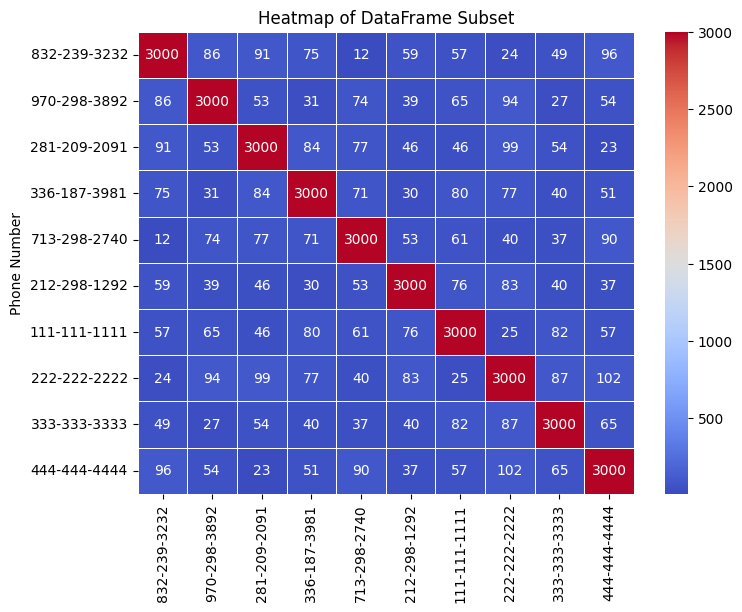

,832-239-3232,970-298-3892,281-209-2091,336-187-3981,713-298-2740,212-298-1292,111-111-1111,222-222-2222,333-333-3333,444-444-4444
Phone Number,,,,,,,,,,
832-239-3232,3000,86,91,75,12,59,57,24,49,96
970-298-3892,86,3000,53,31,74,39,65,94,27,54
281-209-2091,91,53,3000,84,77,46,46,99,54,23
336-187-3981,75,31,84,3000,71,30,80,77,40,51
713-298-2740,12,74,77,71,3000,53,61,40,37,90
212-298-1292,59,39,46,30,53,3000,76,83,40,37
111-111-1111,57,65,46,80,61,76,3000,25,82,57
222-222-2222,24,94,99,77,40,83,25,3000,87,102
333-333-3333,49,27,54,40,37,40,82,87,3000,65


In [53]:
# Replace all 0s with 1000 so that people aren't matched with themselves
subset.replace(0, 3000, inplace=True)
# # Replace all 0s with Na
# subset.replace(0, pd.NA, inplace=True)
plt.figure(figsize=(8, 6))
sns.heatmap(subset, annot=True, cmap='coolwarm', fmt="d", linewidths=.5)
plt.title('Heatmap of DataFrame Subset')
plt.show()

subset

In [55]:
for phone1 in df['Phone Number']:
    for phone2 in df['Phone Number']:
        dem1 = demographics(phone1)
        dem2 = demographics(phone2)
        male1 = dem1[1]
        male2 = dem2[1]
        LikeMen1 = dem1[2]
        LikeMen2 = dem2[2]
        LikeWomen1 = dem1[3]
        LikeWomen2 = dem2[3]
        statement1 = dem1[4]
        statement2 = dem2[4]
        trans1 = dem1[5]
        trans2 = dem2[5]
        nb1 = dem1[6]
        nb2 = dem2[6]
        LikeTrans1 = dem1[7]
        LikeTrans2 = dem2[7]
        LikeNB1 = dem1[8]
        LikeNB2 = dem2[8]

        print()
        # print(phone1, 'Male:',male1, 'Likes men:', LikeMen1, 'Likes women:', LikeWomen1)
        # print(phone2, 'Male:',male2, 'Likes men:', LikeMen2, 'Likes women:', LikeWomen2)
        print(demographics(phone1)[4])
        print(demographics(phone2)[4])

        if phone1 != phone2: # Don't re-penalize the self matches
            if not LikeMen1 and male2:
                # subset[phone1][phone2] = subset[phone1][phone2] + 1000
                # subset.loc[phone1][phone2] = subset.loc[phone1][phone2] + 1000
                subset.loc[phone1, phone2] = subset.loc[phone1, phone2] + 1000
                subset.loc[phone2, phone1] = subset.loc[phone2, phone1] + 1000
                print(phone1, "doesn't like men and", phone2, 'is male')

            if not LikeWomen1 and not male2:
                subset.loc[phone1, phone2] = subset.loc[phone1, phone2] + 1000
                subset.loc[phone2, phone1] = subset.loc[phone2, phone1] + 1000
                print(phone1, "doesn't like women and", phone2, 'is female')

            if not LikeTrans1 and trans2:
                subset.loc[phone1, phone2] = subset.loc[phone1, phone2] + 1000
                subset.loc[phone2, phone1] = subset.loc[phone2, phone1] + 1000
                print(phone1, "doesn't like trans and", phone2, 'is trans')

            if not LikeNB1 and nb2:
                subset.loc[phone1, phone2] = subset.loc[phone1, phone2] + 1000
                subset.loc[phone2, phone1] = subset.loc[phone2, phone1] + 1000
                print(phone1, "doesn't like non-binary and", phone2, 'is non-binary')




832-239-3232 is a Trans Non-Binary Male who likes: Trans & Non-Binary & Females
832-239-3232 is a Trans Non-Binary Male who likes: Trans & Non-Binary & Females

832-239-3232 is a Trans Non-Binary Male who likes: Trans & Non-Binary & Females
970-298-3892 is a Male who likes: Males &
832-239-3232 doesn't like men and 970-298-3892 is male

832-239-3232 is a Trans Non-Binary Male who likes: Trans & Non-Binary & Females
281-209-2091 is a Female who likes: Females

832-239-3232 is a Trans Non-Binary Male who likes: Trans & Non-Binary & Females
336-187-3981 is a Trans Female who likes: Trans & Males &

832-239-3232 is a Trans Non-Binary Male who likes: Trans & Non-Binary & Females
713-298-2740 is a Male who likes: Males &Females
832-239-3232 doesn't like men and 713-298-2740 is male

832-239-3232 is a Trans Non-Binary Male who likes: Trans & Non-Binary & Females
212-298-1292 is a Female who likes: Males &Females

832-239-3232 is a Trans Non-Binary Male who likes: Trans & Non-Binary & Females

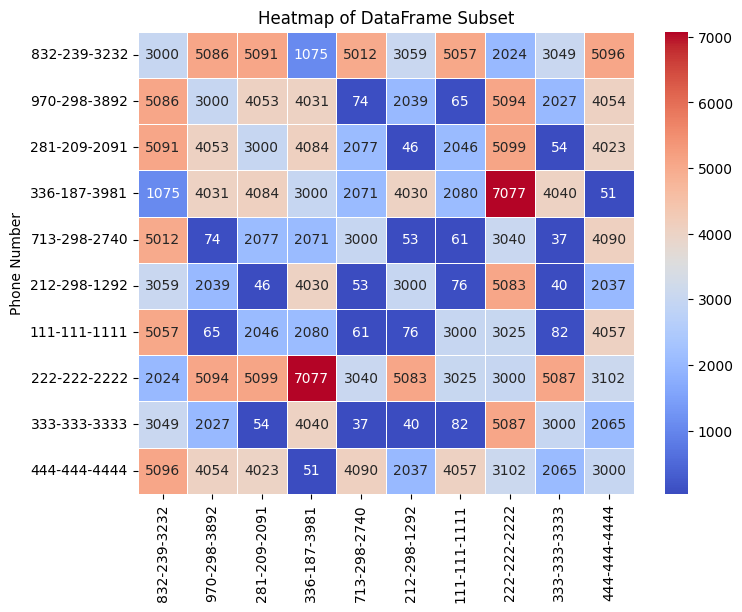

,832-239-3232,970-298-3892,281-209-2091,336-187-3981,713-298-2740,212-298-1292,111-111-1111,222-222-2222,333-333-3333,444-444-4444
Phone Number,,,,,,,,,,
832-239-3232,3000,5086,5091,1075,5012,3059,5057,2024,3049,5096
970-298-3892,5086,3000,4053,4031,74,2039,65,5094,2027,4054
281-209-2091,5091,4053,3000,4084,2077,46,2046,5099,54,4023
336-187-3981,1075,4031,4084,3000,2071,4030,2080,7077,4040,51
713-298-2740,5012,74,2077,2071,3000,53,61,3040,37,4090
212-298-1292,3059,2039,46,4030,53,3000,76,5083,40,2037
111-111-1111,5057,65,2046,2080,61,76,3000,3025,82,4057
222-222-2222,2024,5094,5099,7077,3040,5083,3025,3000,5087,3102
333-333-3333,3049,2027,54,4040,37,40,82,5087,3000,2065


In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(subset, annot=True, cmap='coolwarm', fmt="d", linewidths=.5)
plt.title('Heatmap of DataFrame Subset')
plt.show()
subset

# Step 6: Define a Function Which Says How Good Two Matches Are

In [63]:

def compatable(phone1, phone2):
    error = subset.loc[phone1,phone2]
    # print('Match error:', error)
    column_list = subset[phone1].tolist()
    column_list = sorted(column_list) # sort numbers
    index = column_list.index(error)
    total_numbers = len(column_list)
    percentile = (index) / total_numbers * 100
    # print(column_list)
    # print(index, percentile, total_numbers)
    compatability = 100 - percentile
    incompatible = ''
    if error > 1000:
        incompatible = '***Incompatible Match*** '
        # ____ is there a case where someone with an error > 1000 should have been matched with someone else?
    statement = incompatible + 'With an error of ' + str(error) + ', your match had a ' + str(compatability) + 'th percentile compatability'
    return statement
print(compatable('832-239-3232','222-222-2222'))

***Incompatible Match*** With an error of 2024, your match had a 90.0th percentile compatability


# Step 7: Preform Optimization of the pairs

* define an objective funciton to minimize using SciPy
    * Variables 1-5: which matches 
    * constraint: no more and no less than one match per person
        * constraint funcition: 
            constraint
            for person in persons:
                if total_matches != 1:
                    constraint += 1
            constraint < 1
    * objective funciton: sum of all errors from matches in subset

In [64]:
import numpy as np
from scipy.optimize import linear_sum_assignment

# Use the Hungarian algorithm to find optimal pairings
row_indices, col_indices = linear_sum_assignment(subset)

# Print the optimal pairings
matches = []
for row_index, col_index in zip(row_indices, col_indices):
    phone1 = subset.index[row_index]
    phone2 = subset.columns[col_index]
    print(row_index,col_index)
    # print('[num, male, likes_men, likes_women]')
    # print('Phone1 demographics:', demographics(phone1))
    # print('Phone2 demographics:', demographics(phone2))
    print('Phone',phone1,'matched with phone', phone2)
    print(demographics(phone1)[4])
    print(demographics(phone2)[4])
    # print('error', subset.iloc[row_index,col_index])
    print(compatable(phone1, phone2))
    matches.append([phone1,phone2])
print(matches)

if len(matches) %2 !=0:
    print("Uh Oh, there isn't an equal number of matches, something might go wrong")

0 7
Phone 832-239-3232 matched with phone 222-222-2222
832-239-3232 is a Trans Non-Binary Male who likes: Trans & Non-Binary & Females
222-222-2222 is a Trans Non-Binary Female who likes: Non-Binary & Males &
***Incompatible Match*** With an error of 2024, your match had a 90.0th percentile compatability
1 6
Phone 970-298-3892 matched with phone 111-111-1111
970-298-3892 is a Male who likes: Males &
111-111-1111 is a Male who likes: Males &Females
With an error of 65, your match had a 100.0th percentile compatability
2 5
Phone 281-209-2091 matched with phone 212-298-1292
281-209-2091 is a Female who likes: Females
212-298-1292 is a Female who likes: Males &Females
With an error of 46, your match had a 100.0th percentile compatability
3 9
Phone 336-187-3981 matched with phone 444-444-4444
336-187-3981 is a Trans Female who likes: Trans & Males &
444-444-4444 is a Trans Male who likes: Trans & Females
With an error of 51, your match had a 100.0th percentile compatability
4 8
Phone 713-29